# Assignment 2

###### zuzan

---
Visit the “Publications” section of the Hugo Steinhaus Center website (http:
//prac.im.pwr.wroc.pl/~hugo/HSC/hsc.html). Scrape the data on research
papers from that site and generate a cooperation network of authors in the
following way:
1. members of HCS are the nodes,
2. the size of a node is proportional to the number of papers co-authored by the node,
3. a link between two nodes means a paper written together by the corresponding members,
4. a weight of the link indicates the total number of common papers.

Visualize the network (with names and link weights). Detect the connected components.

---

In [1]:
import requests
import networkx as nx
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

In [2]:
def change_char(string):   # function dealing with polish characters
    x = string.lower()
    x = x.replace('ą', 'a')
    x = x.replace('ä', 'a')
    x = x.replace('ć', 'c')
    x = x.replace('ę', 'e')
    x = x.replace('ł', 'l')
    x = x.replace('ń', 'n')
    x = x.replace('ó', 'o')
    x = x.replace('ö', 'o')
    x = x.replace('ś', 's')
    x = x.replace('ü', 'u')
    x = x.replace('ż', 'z')
    x = x.replace('ź', 'z')
    x = x.title()
    return x

In [3]:
url = 'http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html'
r = requests.get(url)
soup = BeautifulSoup(r.content,"lxml")   # getting html

In [4]:
authors = []
for ol in soup.findAll('ol', attrs={'type': "1"})[2:28]:   # taking only sections of publications from 1995y to 2020y
    publications = ol.findAll('li')
    for publication in publications:   # one li consists of authors' names, year of publication, title, etc.
        one_publ = []
        for item in publication.findAll('b'): #('font'):   # only bolded ones are from HSC
            one_publ.append(item.text)
        #i=0
        #for item in one_publ:
        #    if item.isdigit():
        #        break          # removing elements from year on
        #    i += 1
        #one_publ = one_publ[:i]
        authors.append(one_publ)
        
print(authors)

[['J.Gruszka', 'J.Szwabiński'], ['A.Grzesiek', 'A.Wyłomańska'], ['A.Wyłomańska'], ['P.Kruczek', 'A.Wyłomańska'], ['A.Wyłomańska'], ['Z.Palmowski'], ['M.Balcerek', 'H.Loch-Olszewska', 'A.Weron', 'K.Burnecki'], ['Z.Palmowski'], ['Z.Palmowski'], ['K.Burnecki', 'Z.Palmowski'], ['K.Burnecki', 'G.Sikora', 'A.Weron'], ['K.Burnecki', 'M.Teuerle', 'A.Wilkowska'], ['J.Szwabiński'], ['A.Wylomanska', 'A.Kumar'], ['K.Burnecki'], ['A.Grzesiek', 'M.Teuerle', 'A.Wyłomańska'], ['A.Grzesiek', 'A.Wyłomańska'], ['A.Wyłomańska'], ['A.Wyłomańska'], ['P.Kowalek', 'H.Loch-Olszewska ', 'J.Szwabiński'], ['P.Kruczek', 'A.Wylomanska'], ['A.Wyłomańska'], ['A.Wyłomańska', 'R.Połoczański'], ['Z.Palmowski'], ['M.Magdziarz'], ['M.Magdziarz', 'T.Zórawik'], ['A.Michalak', 'A.Wylomanska'], ['K.Burnecki'], ['Z.Palmowski'], ['Z.Palmowski'], ['G.Sikora', 'Ł.Bielak', 'A.Wyłomańska'], ['K.Burnecki  ', 'J.Janczura', 'A.Weron'], ['A.Grzesiek', 'A.Wyłomańska'], ['J.Ślęzak', 'K.Burnecki'], ['J.Ślęzak', 'M.Magdziarz'], ['A.Weron',

In [5]:
authors_new = []
for one_publ in authors:
    one_publ_new = []
    for item in one_publ:
        item_new = change_char(item)   # converting non ascii characters
        item_new = item_new.replace(' ', '')   # removing spaces
        item_new = item_new.split('-')[0]   # removing second surname if appears
        one_publ_new.append(item_new)
    if one_publ_new:
        authors_new.append(one_publ_new)
    
print(authors_new)

[['J.Gruszka', 'J.Szwabinski'], ['A.Grzesiek', 'A.Wylomanska'], ['A.Wylomanska'], ['P.Kruczek', 'A.Wylomanska'], ['A.Wylomanska'], ['Z.Palmowski'], ['M.Balcerek', 'H.Loch', 'A.Weron', 'K.Burnecki'], ['Z.Palmowski'], ['Z.Palmowski'], ['K.Burnecki', 'Z.Palmowski'], ['K.Burnecki', 'G.Sikora', 'A.Weron'], ['K.Burnecki', 'M.Teuerle', 'A.Wilkowska'], ['J.Szwabinski'], ['A.Wylomanska', 'A.Kumar'], ['K.Burnecki'], ['A.Grzesiek', 'M.Teuerle', 'A.Wylomanska'], ['A.Grzesiek', 'A.Wylomanska'], ['A.Wylomanska'], ['A.Wylomanska'], ['P.Kowalek', 'H.Loch', 'J.Szwabinski'], ['P.Kruczek', 'A.Wylomanska'], ['A.Wylomanska'], ['A.Wylomanska', 'R.Poloczanski'], ['Z.Palmowski'], ['M.Magdziarz'], ['M.Magdziarz', 'T.Zorawik'], ['A.Michalak', 'A.Wylomanska'], ['K.Burnecki'], ['Z.Palmowski'], ['Z.Palmowski'], ['G.Sikora', 'L.Bielak', 'A.Wylomanska'], ['K.Burnecki', 'J.Janczura', 'A.Weron'], ['A.Grzesiek', 'A.Wylomanska'], ['J.Slezak', 'K.Burnecki'], ['J.Slezak', 'M.Magdziarz'], ['A.Weron', 'J.Janczura'], ['A.Wyl

In [19]:
authors_counter = dict(Counter([item for sublist in authors_new for item in sublist]))  # how many pubications each person wrote

In [37]:
len(authors_counter)  # how many people

57

In [20]:
G = nx.Graph()

In [21]:
for one_publ in authors_new:
    if len(one_publ) > 1: 
        edges = list(combinations(one_publ, 2))   # possible combinations of co-authors within one publication

        for i,j in edges:  
            if (i,j) in G.edges() or (j,i) in G.edges():   # adding weight to the edge, if exists
                G[i][j]['weight'] += 1    
            else:
                G.add_edge(i, j, weight = 1)   # creating edge between co-authors, if it does not exist yet

    elif one_publ[0] not in G.nodes():  # if there is a single author, creating node for them, if it does not exist yet
        G.add_node(one_publ[0])

In [22]:
sizes = [authors_counter[name]*25 for name in list(G.nodes)]   # size depending on number of written publications

In [23]:
G.nodes

NodeView(('J.Gruszka', 'J.Szwabinski', 'A.Grzesiek', 'A.Wylomanska', 'P.Kruczek', 'Z.Palmowski', 'M.Balcerek', 'H.Loch', 'A.Weron', 'K.Burnecki', 'G.Sikora', 'M.Teuerle', 'A.Wilkowska', 'A.Kumar', 'P.Kowalek', 'R.Poloczanski', 'M.Magdziarz', 'T.Zorawik', 'A.Michalak', 'L.Bielak', 'J.Janczura', 'J.Slezak', 'G.Zak', 'D.Kucharczyk', 'L.Plociniczak', 'A.Fulinski', 'J.Gajda', 'J.Sokolowski', 'A.Stanislavsky', 'J.Goncerzewicz', 'J.Obuchowski', 'W.Okrasinski', 'M.Muszkieta', 'R.Weron', 'S.Orzel', 'W.Mydlarczyk', 'A.Jurlewicz', 'J.Iwanik', 'E.Broszkiewicz', 'J.Nowicka', 'A.Misiorek', 'M.Borgosz', 'Z.Michna', 'P.Mista', 'M.Kozlowski', 'T.Piesiewicz', 'A.Makagon', 'P.Wilman', 'G.Kukla', 'S.Ondruszko', 'B.Stawiarski', 'B.Kozlowska', 'M.Kotulski', 'B.Przybylowicz', 'S.Staskiewicz', 'A.Janicki', 'P.Sztuba'))

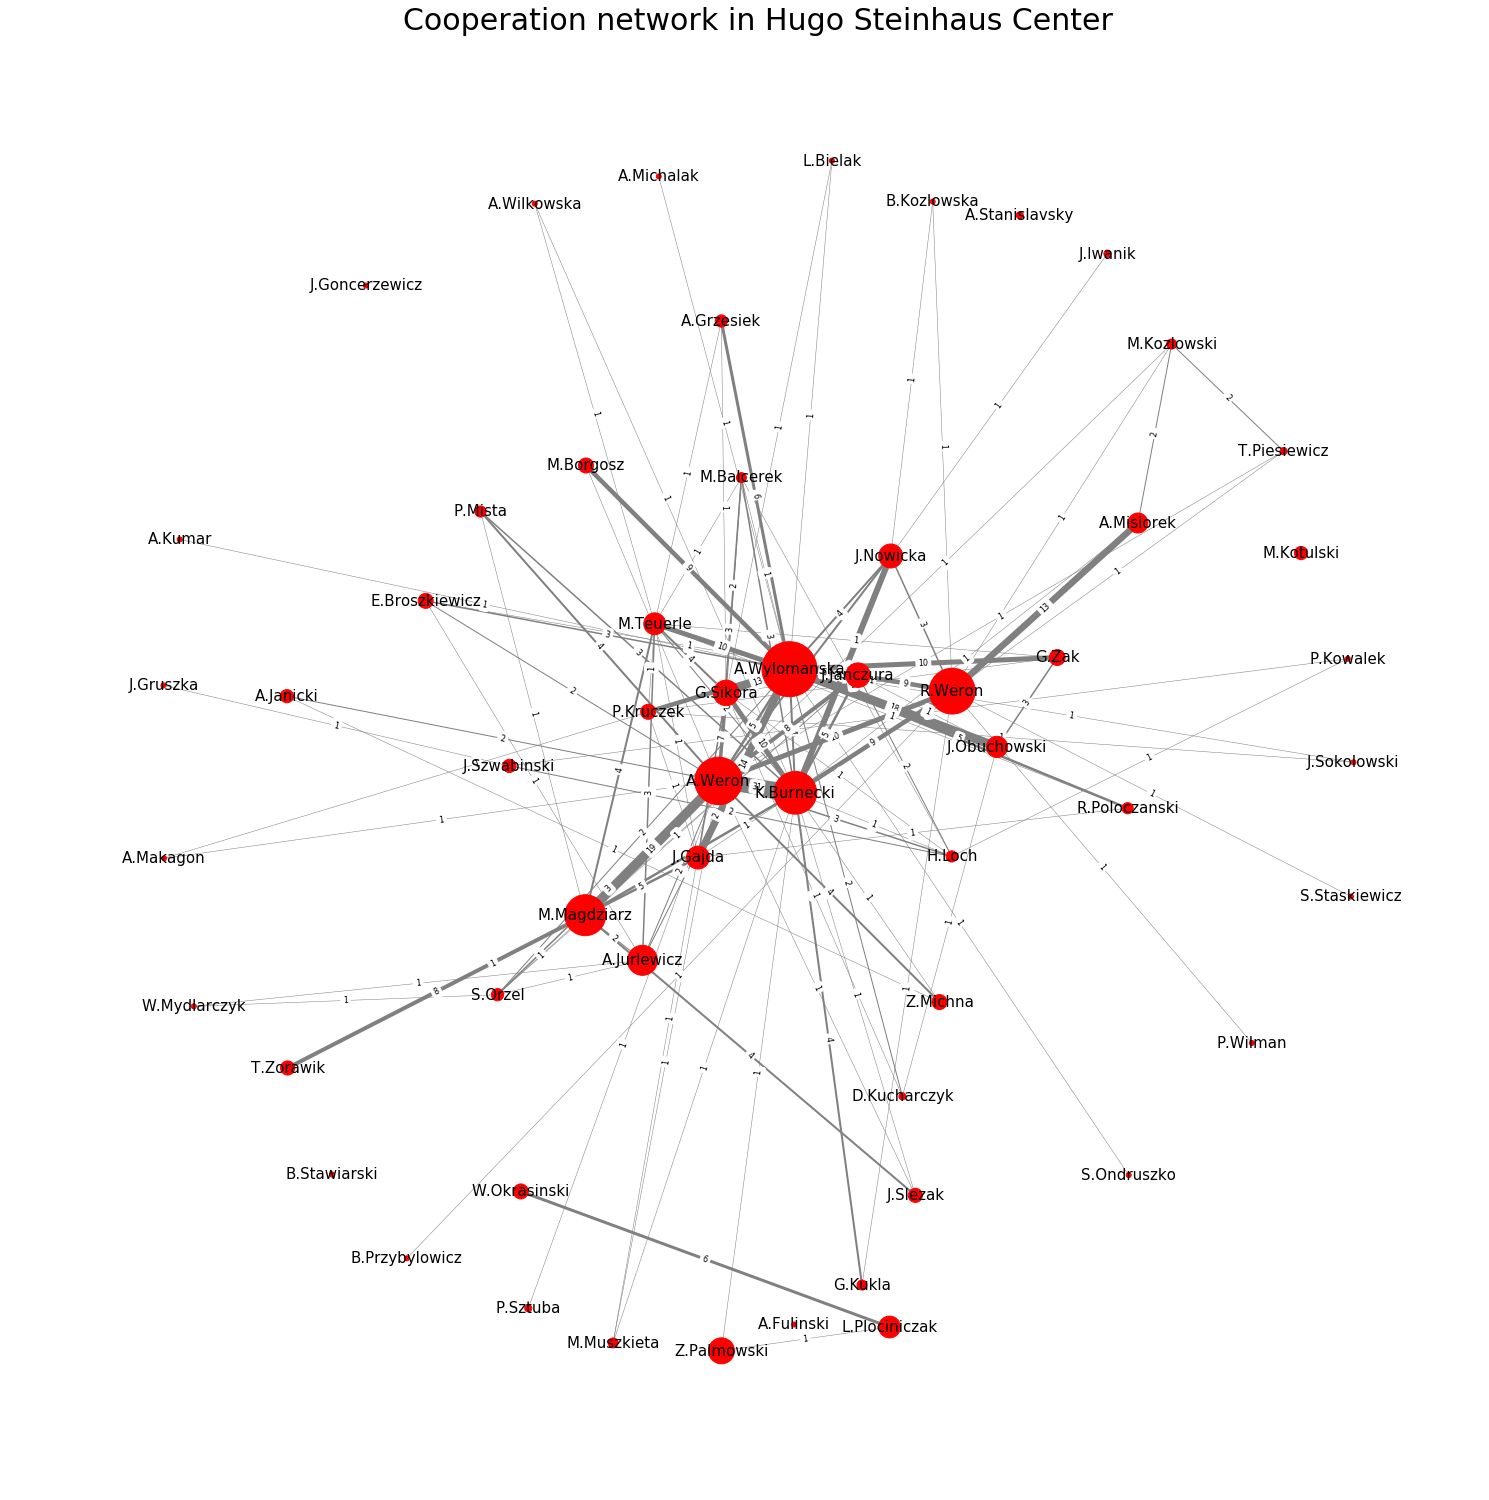

In [24]:
plt.figure(figsize = (20,20)) 
pos = nx.spring_layout(G, k = 2.3, iterations = 100)
edge_width = [G[i][j]['weight']/2 for i,j in G.edges()]
nx.draw(G, pos, node_size = sizes, with_labels = True, font_size=15, edge_color='gray', width=edge_width)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, font_size = 8)
plt.title("Cooperation network in Hugo Steinhaus Center", fontdict = {'fontsize' : 30})
#plt.savefig('cooperation_network.pdf')
plt.show()

In [15]:
for w in sorted(authors_counter, key=authors_counter.get, reverse=True):   # how many publications written (in decreasing order)
    print(w, authors_counter[w])

A.Wylomanska 121
A.Weron 90
R.Weron 84
K.Burnecki 73
M.Magdziarz 67
A.Jurlewicz 36
Z.Palmowski 27
G.Sikora 26
J.Janczura 24
J.Nowicka 23
J.Gajda 21
M.Teuerle 19
L.Plociniczak 19
J.Obuchowski 18
A.Misiorek 16
G.Zak 10
P.Kruczek 9
W.Okrasinski 9
E.Broszkiewicz 9
M.Borgosz 9
Z.Michna 9
T.Zorawik 8
J.Slezak 8
J.Szwabinski 7
M.Kotulski 7
A.Janicki 7
A.Grzesiek 6
S.Orzel 6
H.Loch 5
R.Poloczanski 5
P.Mista 5
M.Balcerek 4
M.Muszkieta 4
M.Kozlowski 4
G.Kukla 4
D.Kucharczyk 2
A.Stanislavsky 2
J.Iwanik 2
T.Piesiewicz 2
P.Sztuba 2
J.Gruszka 1
A.Wilkowska 1
A.Kumar 1
P.Kowalek 1
A.Michalak 1
L.Bielak 1
A.Fulinski 1
J.Sokolowski 1
J.Goncerzewicz 1
W.Mydlarczyk 1
A.Makagon 1
P.Wilman 1
S.Ondruszko 1
B.Stawiarski 1
B.Kozlowska 1
B.Przybylowicz 1
S.Staskiewicz 1


In [30]:
nx.number_of_isolates(G)   # how many nodes with no connections

5

In [36]:
[*nx.isolates(G)]   # names of authors not cooperating with others (from HSC)

['A.Fulinski',
 'A.Stanislavsky',
 'J.Goncerzewicz',
 'B.Stawiarski',
 'M.Kotulski']